<a href="https://colab.research.google.com/github/Jayneet123/IPL-Data-Analysis/blob/main/IPL_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

In [3]:
!unzip /content/IPLData.zip

Archive:  /content/IPLData.zip
  inflating: Players.xlsx            
  inflating: deliveries.csv          
  inflating: matches.csv             
  inflating: most_runs_average_strikerate.csv  
  inflating: teams.csv               
  inflating: teamwise_home_and_away.csv  


In [46]:
data = pd.read_csv('matches.csv')

In [5]:
data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [6]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [9]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [47]:
# data = data.iloc[:,:-1]
data = data.iloc[0:,:17]
data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [48]:
data.dropna(inplace=True)

In [49]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [50]:
# for Delhi Capitals
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
# for Sunrisers Hyderabad
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
# for Pune Warriors
data['team1']=data['team1'].str.replace('Pune Warriors','Rising Pune Supergiants')
data['team2']=data['team2'].str.replace('Pune Warriors','Rising Pune Supergiants')
data['winner']=data['winner'].str.replace('Pune Warriors','Rising Pune Supergiants')
# for Rising Pune Supergiant
data['team1']=data['team1'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['team2']=data['team2'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['winner']=data['winner'].str.replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['winner']=data['winner'].str.replace('Rising Pune Supergiantss','Rising Pune Supergiants')

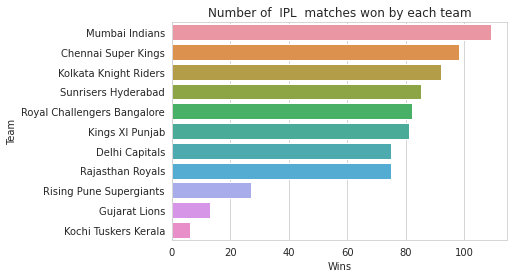

In [53]:
sns.countplot(y='winner',data=data,order=data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')
plt.show()

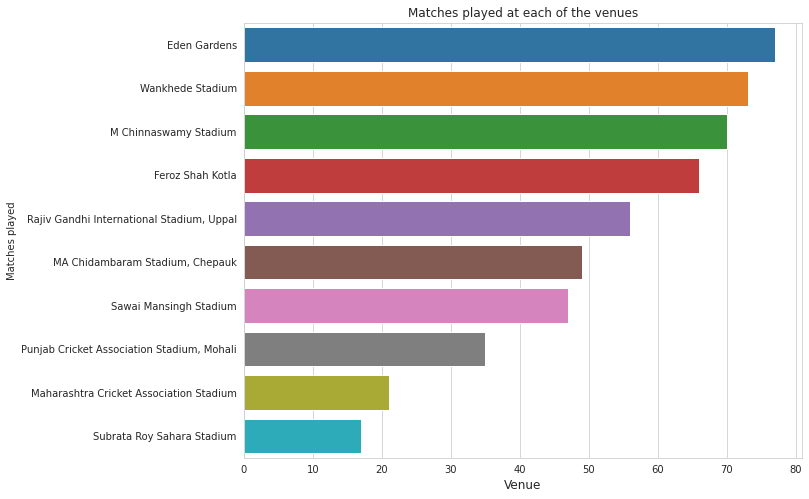

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(y='venue',data=data,order=data['venue'].value_counts().index) # all stadiums
sns.countplot(y='venue',data=data,order=data['venue'].value_counts().iloc[:10].index)
plt.xlabel('Venue',fontsize=12)
plt.ylabel('Matches played')
plt.title('Matches played at each of the venues')
plt.show()

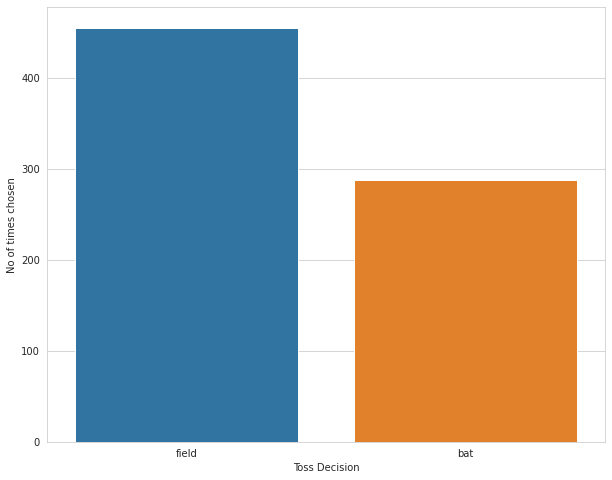

In [63]:
plt.figure(figsize=(10,8))
sns.countplot(x='toss_decision',data=data)
plt.ylabel('No of times chosen')
plt.xlabel('Toss Decision')
plt.show()

In [64]:
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(data[i].unique())
  print(data[i].value_counts())

------------
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur      

In [70]:
data.drop(["id","Season","city","date","player_of_match","venue","umpire1","umpire2"],axis=1,inplace=True)

In [71]:
X = data.drop(["winner"], axis=1)
y = data["winner"]

In [72]:
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True) #giving importance to 0 with drop_first

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # convert labels to numeric form 
y = le.fit_transform(y)
y

array([10,  8,  5,  3, 10,  6,  3,  1,  6,  5,  6,  2,  5,  1,  6,  8,  5,
       10,  9, 10,  6,  2,  6,  8,  3,  5,  8,  5,  2,  5, 10,  8,  6,  3,
       10,  6,  8,  1,  8,  1,  3,  8,  6,  5,  2, 10,  3,  1,  3,  1, 10,
        6,  8,  9,  8,  5,  6,  6,  5,  0,  1,  9,  5,  7,  1,  0,  7,  3,
        7,  0, 10,  3,  0,  6,  1,  3,  7,  1,  9,  3,  6,  7,  3, 10,  6,
        0,  5,  7,  6,  0,  5,  7,  3,  5,  6,  3,  1,  6,  3,  7,  6,  0,
        1,  7,  3,  9,  3,  1,  7,  9,  5,  7,  0,  7,  0,  7,  6,  9,  1,
       10,  0,  5, 10,  1,  7,  3, 10,  1,  3, 10,  6,  7,  9,  3,  1,  0,
        6,  9,  7,  0,  3,  9,  0,  7,  1, 10,  7,  0,  1,  3,  0,  6,  1,
       10,  9,  6,  1,  9,  7,  3,  0, 10,  3,  1,  5,  9,  5,  0,  1,  9,
       10,  9, 10,  5,  6,  1,  5, 10,  1,  9,  0,  6,  9,  0, 10,  7,  9,
       10,  3,  6,  9,  7,  6,  7,  5,  1,  7,  6,  1,  6,  0,  1,  5,  9,
        0,  6,  3,  1,  7,  0,  7,  5, 10,  3, 10,  9,  3,  6, 10,  6,  0,
        9,  1, 10,  6,  5

In [77]:
X

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Rajasthan Royals,...,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_tie
0,0,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,7,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,10,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
751,0,0,9,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
752,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,max_features = "auto")

In [90]:
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [91]:
y_pred = model.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)

In [93]:
ac

0.9530201342281879

In [94]:
y_pred

array([ 6, 10,  3,  0,  5, 10, 10,  5,  0,  7,  5,  5,  5,  0,  1,  1,  5,
        0, 10,  5,  3,  0,  1,  9,  5, 10,  6,  6, 10,  0,  0,  1,  3,  9,
        1,  0,  0,  6,  7, 10,  7, 10,  9, 10,  0,  3, 10,  3,  6,  6,  0,
        5,  7,  5,  9,  6,  9,  7,  1,  3,  6,  7,  3,  3,  3,  2, 10,  5,
       10,  0,  9,  6,  3, 10,  6, 10, 10,  0,  1,  3,  6,  0,  3,  5,  6,
       10,  1, 10,  3,  1,  6,  1,  6, 10,  0,  3,  1,  3,  6,  6,  6,  5,
        6,  0,  5,  6, 10,  1,  7,  6,  5,  0,  0,  7,  7,  5,  0, 10,  5,
        0,  7,  6,  5,  9,  6,  1,  7, 10,  0,  2,  1,  5,  3,  0,  3, 10,
        0,  0,  5,  0, 10,  9,  0,  6,  1,  1,  9,  3,  9])

In [100]:
y_test

array([ 6, 10,  3,  0,  5, 10, 10,  5,  0,  7,  5,  5,  5,  0,  1,  1,  5,
        0, 10,  5,  3,  8,  1,  9,  5, 10,  6,  6, 10,  5,  0,  1,  3,  9,
        1,  0,  0,  6,  7, 10,  7, 10,  9, 10,  0,  3, 10,  3,  6,  6,  0,
        5,  7,  5,  9,  6,  9,  7,  1,  3,  6,  7,  3,  3,  3,  2, 10,  5,
       10,  0,  9,  6,  3, 10,  6, 10,  7,  0,  1,  3,  6,  0,  3,  5,  6,
       10,  1, 10,  3,  1,  6,  1,  6, 10,  4,  3,  1,  3,  6,  6,  6,  5,
        6,  8,  5,  6, 10,  1,  7,  6,  5,  0,  0,  7,  7,  5,  0, 10,  5,
        0,  7,  6,  5,  9,  6,  1,  7, 10,  0,  2,  1,  5,  3,  2,  3,  8,
        0,  0,  5,  0, 10,  9,  0,  6,  1,  1,  9,  3,  9])

In [101]:
x_test

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Rajasthan Royals,...,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_tie
507,0,15,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
31,0,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
289,0,0,6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
378,0,38,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
503,0,0,8,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,0,7,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
418,0,15,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
623,0,0,9,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
508,0,16,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
